<center><h2 style="color:brown">Diamonds Dataset</h2></center>

<center><h2 style="color:brown">EDA</h2></center>

<h3 style="color:blue">Data Description:</h3>

1. Title : Diamonds Dataset

2. the 7th column "price" is the values to be predicted.

3. Data Type : Mixed ( Numerical + Categorical)
	
4. Dataset has nearly 54000 instances.

5. It has 10 features.

6. Features 

	price : price in US dollars (\$326--\$18,823)

	carat : weight of the diamond (0.2--5.01)

	cut   : quality of the cut (Fair, Good, Very Good, Premium, Ideal)

	color : diamond colour, from J (worst) to D (best)

	clarity : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

	x : length in mm (0--10.74)

	y : width in mm (0--58.9)

	z : depth in mm (0--31.8)

	depth : total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

	table : width of top of diamond relative to widest point (43--95)


7. Caution : Handle Categorical data before building a model.

<h3 style="color:blue">Importing libraries:</h3>

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("diamonds.csv")

In [4]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.shape

(53940, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


we can observe from the dataset that x,y,z minimum values is zero which is a invalid value,so take the rows that are not zero and do the description

In [8]:
df = df.loc[(df[['x','y','z']]!=0).all(axis=1)]

In [9]:
df.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [10]:
#Null values checking
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

No null values

<h3 style = "color:blue">univariate analysis</h3>

In [11]:
#function to plot pdf and hist graphs
def distr_plot(col_name):
    sns.set_style("darkgrid")
    plt.figure(figsize=(12,6))
    plt.subplot(1, 2, 1)
    sns.distplot(df[col_name])
    plt.axvline(df[col_name].mean(), color="red", label="Mean")
    plt.legend(shadow=True,fontsize="larger")
    plt.title("Pdf distribution")
    
    plt.subplot(1, 2, 2)
    sns.histplot(df[col_name])
    plt.axvline(df[col_name].mean(), color="orange", label="Mean")
    plt.legend(shadow=True,fontsize="larger")
    plt.title("Frequency distribution")

    skew = df[col_name].skew()
    kurt = df[col_name].kurt()
    print('Skewness:{}'.format(round(skew,2)))
    print('Kurtosis:{}'.format(round(kurt,2)))

<h3 style = "color:blue">carat feature data distibution</h3>

Skewness:1.12
Kurtosis:1.26


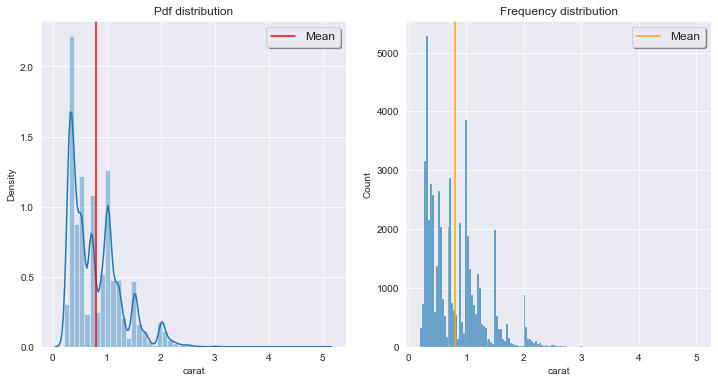

In [15]:
distr_plot('carat')

From the plot we can observe a long tail towards right and implies high positive skweness of data

<h3 style = "color:blue">depth feature data distribution</h3>

Skewness:-0.08
Kurtosis:5.75


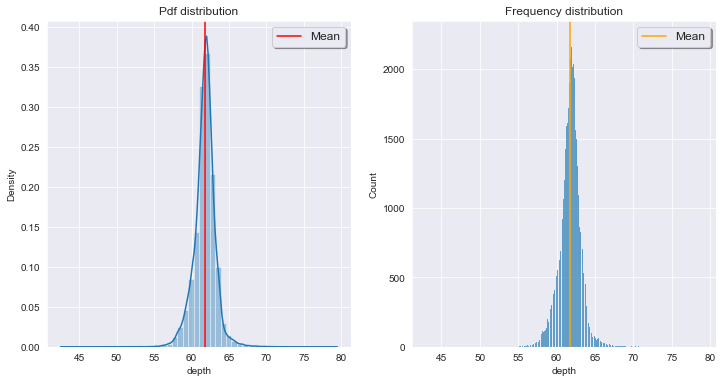

In [14]:
distr_plot('depth')

according to the skweness values it has no skweness and the distributon of the data from the graph is uniformly distributed

<h3 style = "color:blue">table feature data distribution</h3>

Skewness:0.8
Kurtosis:2.8


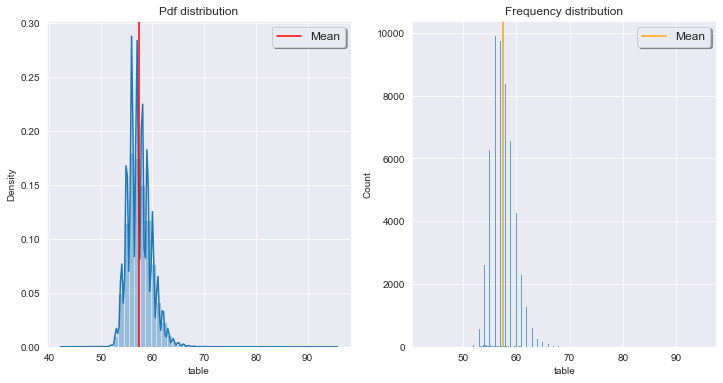

In [16]:
distr_plot('table')

<h3 style = "color:blue">price data distribution</h3>

Skewness:1.62
Kurtosis:2.18


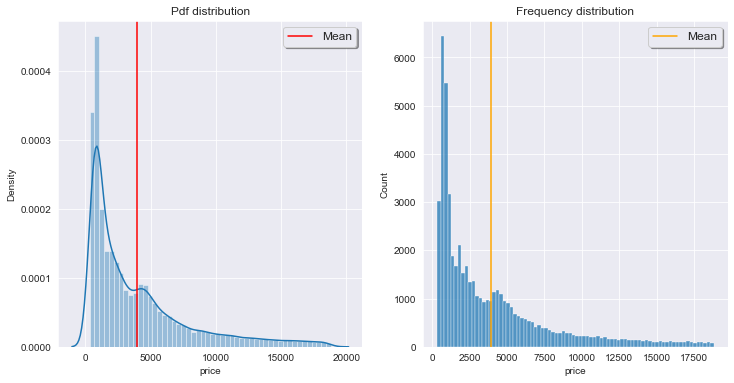

In [18]:
distr_plot('price')

From the plot we can observe that data is right positively skewed

<h3 style = "color:blue">x feature data distribution</h3>

Skewness:0.4
Kurtosis:-0.7


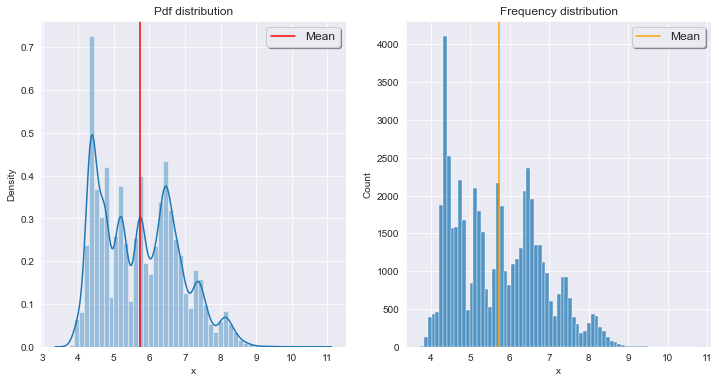

In [16]:
distr_plot('x')

<h3 style = "color:blue">y feature data distribution:</h3>

Skewness:2.46
Kurtosis:91.83


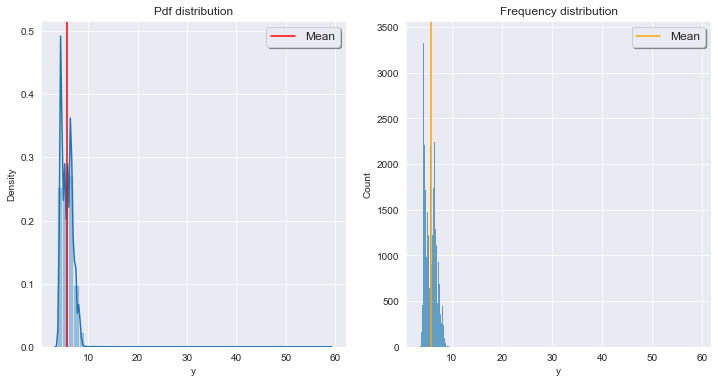

In [17]:
distr_plot('y')

<h3 style = "color:blue">z feature data distribution</h3>

Skewness:1.59
Kurtosis:47.76


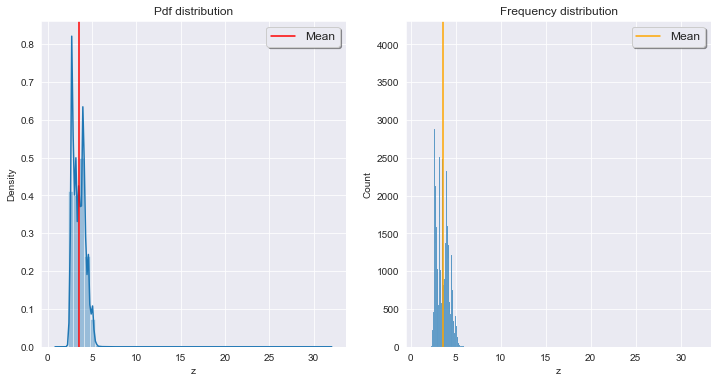

In [18]:
distr_plot('z')

<h3 style = "color:blue">cut feature data distribution</h3>

In [19]:
cut_data= df['cut'].unique()
cut_data

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [20]:
len(cut_data) 

5

In [21]:
cut_count = df['cut'].value_counts()
cut_count

Ideal        21548
Premium      13780
Very Good    12081
Good          4902
Fair          1609
Name: cut, dtype: int64

Text(0.5, 1.0, 'countplot for cut feature')

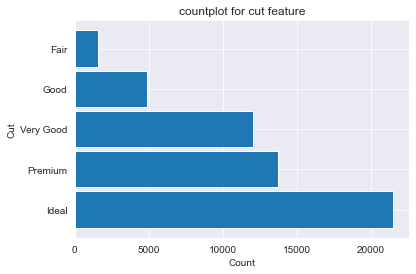

In [108]:
sns.set_style("darkgrid")
plt.figure(figsize=(6,4))
cut_count.plot(kind='barh' , width=0.9)
plt.ylabel('Cut')
plt.xlabel('Count')
plt.title("countplot for cut feature")

<h3 style = "color:blue">color feature data distribution</h3>

In [23]:
color_data= df['color'].unique()
color_data

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [24]:
len(color_data)

7

In [25]:
color_count = df['color'].value_counts()
color_count

G    11284
E     9797
F     9538
H     8298
D     6774
I     5421
J     2808
Name: color, dtype: int64

Text(0.5, 1.0, 'countplot')

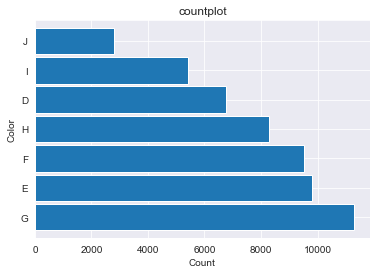

In [26]:
sns.set_style("darkgrid")
plt.figure(figsize=(6,4))
color_count.plot(kind='barh' , width=0.9)
plt.ylabel('Color')
plt.xlabel('Count')
plt.title("countplot")

<h3 style = "color:blue">clarity feature data distribution</h3>

In [27]:
clarity_data= df['clarity'].unique()
clarity_data

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [28]:
len(clarity_data)

8

In [29]:
clarity_count = df['clarity'].value_counts()
clarity_count

SI1     13063
VS2     12254
SI2      9185
VS1      8170
VVS2     5066
VVS1     3654
IF       1790
I1        738
Name: clarity, dtype: int64

Text(0, 0.5, 'Count')

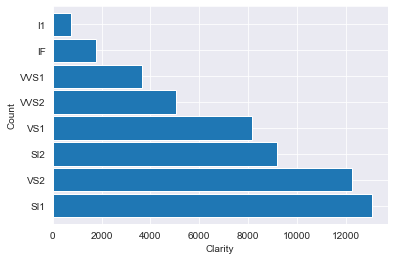

In [30]:
sns.set_style("darkgrid")
plt.figure(figsize=(6,4))
clarity_count.plot(kind='barh' , width=0.9)
plt.xlabel('Clarity')
plt.ylabel('Count')

<h3 style = "color:blue"> Bivariate Analysis</h3>

<h4 style = "color:green">Pair plot for the features</h4>

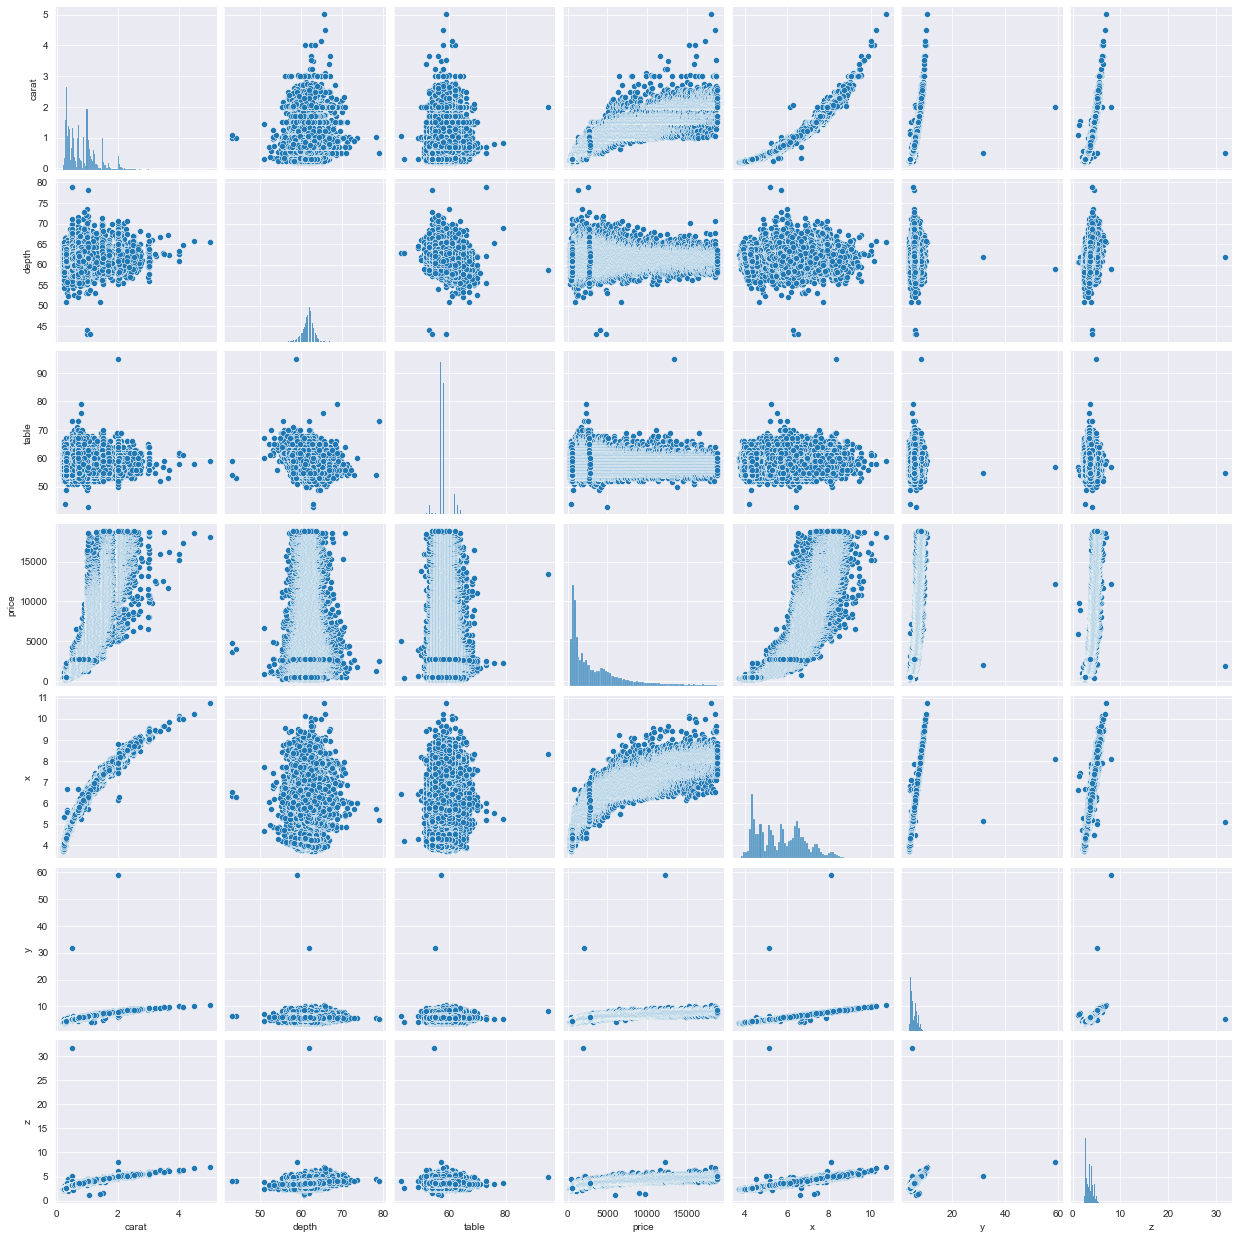

In [32]:
sns.pairplot(df)

<h4 style = "color:green">Heatmap for the features</h4>

<AxesSubplot:>

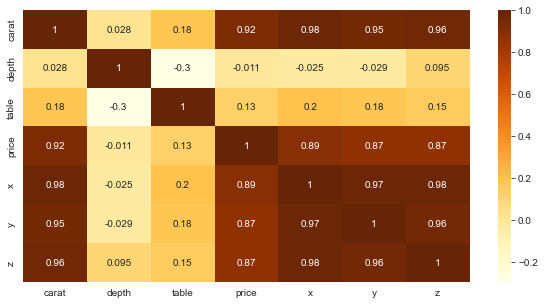

In [33]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(),annot = True,cmap="YlOrBr")


we can observe that x,y,z are highely correlated with target variable price

<h4 style = "color:green">Outliers Detection:</h4>

In [34]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_df = df.select_dtypes(include=numerics)

In [35]:
a = num_df.columns
list1 = list(a)

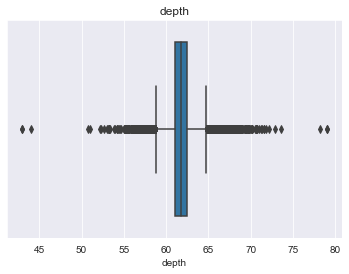

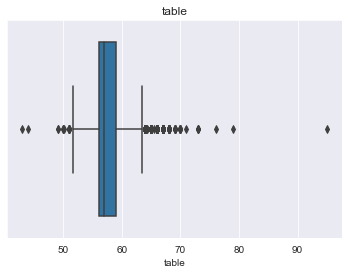

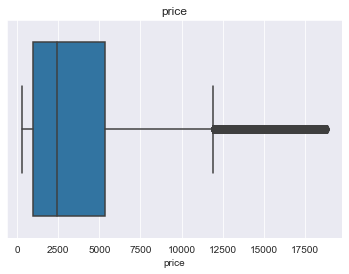

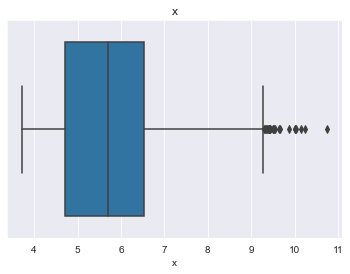

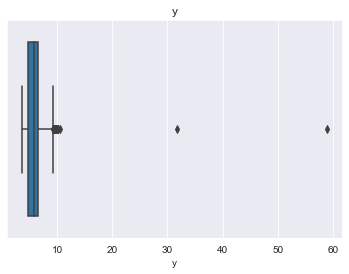

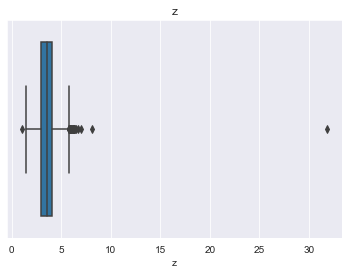

In [36]:
#box plot for the numerical features
for i in list1[1:]:
    sns.boxplot(num_df[i])
    plt.title(i)
    plt.show()

In [37]:
#Dropping the outliers excluding price feature. 
df = df[(df["depth"]<75)&(df["depth"]>45)]
df = df[(df["table"]<80)&(df["table"]>40)]
df = df[(df["x"]<30)]
df = df[(df["y"]<30)]
df = df[(df["z"]<30)&(df["z"]>2)]

<center><h3 style="color:brown">Machine Learning Problem:</h3></center>

__Build a system which can take features of diamond like carat, cut, color, clarity, x, y, z, etc.. and predicts the price of diamond.__

__Target variable: Price__  

__Input variables: carat, cut, color, clarity, depth, table, x, y, z__ 

In [38]:
import sklearn

In [39]:
# Identifying the inputs (X) and output (y)

y = df['price']

X = df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]

In [40]:
# split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=33)

In [41]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
2453,0.74,Ideal,E,VS2,59.5,57.0,5.92,5.94,3.53
18788,1.08,Premium,D,VS2,61.2,60.0,6.61,6.63,4.05
13937,1.35,Ideal,H,SI2,60.0,57.0,7.19,7.15,4.30
22747,1.50,Very Good,F,SI1,62.6,60.0,7.18,7.27,4.52
30955,0.32,Premium,E,SI2,61.2,58.0,4.39,4.44,2.70


In [42]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(37734, 9) (37734,)
(16173, 9) (16173,)


<h4 style = "color:green">Separating Categorical and Numerical Columns:</h4>

In [43]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
2453,0.74,Ideal,E,VS2,59.5,57.0,5.92,5.94,3.53
18788,1.08,Premium,D,VS2,61.2,60.0,6.61,6.63,4.05
13937,1.35,Ideal,H,SI2,60.0,57.0,7.19,7.15,4.30
22747,1.50,Very Good,F,SI1,62.6,60.0,7.18,7.27,4.52
30955,0.32,Premium,E,SI2,61.2,58.0,4.39,4.44,2.70


In [56]:
X_train.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
dtype: object

In [44]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()

,cut,color,clarity
2453,Ideal,E,VS2
18788,Premium,D,VS2
13937,Ideal,H,SI2
22747,Very Good,F,SI1
30955,Premium,E,SI2


In [45]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

X_train_num.head()

,carat,depth,table,x,y,z
2453,0.74,59.5,57.0,5.92,5.94,3.53
18788,1.08,61.2,60.0,6.61,6.63,4.05
13937,1.35,60.0,57.0,7.19,7.15,4.30
22747,1.50,62.6,60.0,7.18,7.27,4.52
30955,0.32,61.2,58.0,4.39,4.44,2.70


<h4 style = "color:green">Scaling the Numerical Features:</h4>

In [46]:
X_train_num.head()

,carat,depth,table,x,y,z
2453,0.74,59.5,57.0,5.92,5.94,3.53
18788,1.08,61.2,60.0,6.61,6.63,4.05
13937,1.35,60.0,57.0,7.19,7.15,4.30
22747,1.50,62.6,60.0,7.18,7.27,4.52
30955,0.32,61.2,58.0,4.39,4.44,2.70


In [47]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,carat,depth,table,x,y,z
2453,-0.120070,-1.591809,-0.205512,0.169985,0.187603,-0.012163
18788,0.598645,-0.388458,1.148672,0.786930,0.808948,0.740824
13937,1.169390,-1.237883,-0.205512,1.305521,1.277208,1.102837
22747,1.486470,0.602537,1.148672,1.296579,1.385268,1.421409
30955,-1.007896,-0.388458,0.245883,-1.198023,-1.163148,-1.214046


<h4 style = "color:green">Applying Label Encoding on Categorical Columns:</h4>

In [48]:
X_train_cat_le = pd.DataFrame(index=X_train_cat.index)

X_train_cat_le.head()

""
2453
18788
13937
22747
30955


In [49]:
X_train_cat.cut.unique()

array(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype=object)

In [50]:
cut_encoder = {'Fair' : 1, 'Good' : 2, 'Very Good' : 3, 'Ideal' : 4, 'Premium' : 5}

X_train_cat_le['cut'] = X_train_cat['cut'].apply(lambda x : cut_encoder[x])

X_train_cat_le.head()

,cut
2453,4
18788,5
13937,4
22747,3
30955,5


In [51]:
X_train_cat.color.unique()

array(['E', 'D', 'H', 'F', 'I', 'G', 'J'], dtype=object)

In [52]:
color_encoder = {'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}

X_train_cat_le['color'] = X_train_cat['color'].apply(lambda x : color_encoder[x])

X_train_cat_le.head()

,cut,color
2453,4,6
18788,5,7
13937,4,3
22747,3,5
30955,5,6


In [53]:
X_train_cat.clarity.unique()

array(['VS2', 'SI2', 'SI1', 'VVS1', 'I1', 'VS1', 'VVS2', 'IF'],
      dtype=object)

In [54]:
clarity_encoder = {'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

X_train_cat_le['clarity'] = X_train_cat['clarity'].apply(lambda x : clarity_encoder[x])

X_train_cat_le.head()

,cut,color,clarity
2453,4,6,4
18788,5,7,4
13937,4,3,2
22747,3,5,3
30955,5,6,2


<h4 style = "color:green">Concatinating the Encoded Categorical Features and Rescaled Numerical Features::</h4>

In [55]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_le], axis=1)

X_train_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
2453,-0.120070,-1.591809,-0.205512,0.169985,0.187603,-0.012163,4,6,4
18788,0.598645,-0.388458,1.148672,0.786930,0.808948,0.740824,5,7,4
13937,1.169390,-1.237883,-0.205512,1.305521,1.277208,1.102837,4,3,2
22747,1.486470,0.602537,1.148672,1.296579,1.385268,1.421409,3,5,3
30955,-1.007896,-0.388458,0.245883,-1.198023,-1.163148,-1.214046,5,6,2


<h4 style = "color:green">Preparing Test Data:</h4>

In [56]:
X_test.head()

,carat,cut,color,clarity,depth,table,x,y,z
16541,1.25,Ideal,G,SI1,60.4,57.0,7.03,7.00,4.24
469,0.70,Premium,E,VS1,59.6,57.0,5.91,5.83,3.50
31257,0.32,Ideal,D,VS2,62.4,57.0,4.34,4.38,2.72
49593,0.72,Ideal,J,VVS2,60.9,58.0,5.74,5.78,3.51
42333,0.45,Ideal,G,VVS1,61.5,57.0,4.91,4.95,3.03


In [57]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16173 entries, 16541 to 17436
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    16173 non-null  float64
 1   cut      16173 non-null  object 
 2   color    16173 non-null  object 
 3   clarity  16173 non-null  object 
 4   depth    16173 non-null  float64
 5   table    16173 non-null  float64
 6   x        16173 non-null  float64
 7   y        16173 non-null  float64
 8   z        16173 non-null  float64
dtypes: float64(6), object(3)
memory usage: 1.2+ MB


In [58]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,cut,color,clarity
16541,Ideal,G,SI1
469,Premium,E,VS1
31257,Ideal,D,VS2
49593,Ideal,J,VVS2
42333,Ideal,G,VVS1


In [59]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,carat,depth,table,x,y,z
16541,1.25,60.4,57.0,7.03,7.00,4.24
469,0.70,59.6,57.0,5.91,5.83,3.50
31257,0.32,62.4,57.0,4.34,4.38,2.72
49593,0.72,60.9,58.0,5.74,5.78,3.51
42333,0.45,61.5,57.0,4.91,4.95,3.03


In [60]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,carat,depth,table,x,y,z
16541,0.958003,-0.954741,-0.205512,1.162461,1.142133,1.015954
469,-0.204625,-1.521024,-0.205512,0.161044,0.088548,-0.055605
31257,-1.007896,0.460966,-0.205512,-1.242729,-1.217178,-1.185085
49593,-0.162348,-0.600814,0.245883,0.009043,0.043523,-0.041124
42333,-0.733093,-0.176102,-0.205512,-0.733079,-0.703893,-0.736189


In [61]:
X_test_cat_le = pd.DataFrame(index = X_test_cat.index)

X_test_cat_le.head()

""
16541
469
31257
49593
42333


In [62]:
X_test_cat_le['cut'] = X_test_cat['cut'].apply(lambda x : cut_encoder[x])

X_test_cat_le['color'] = X_test_cat['color'].apply(lambda x : color_encoder[x])

X_test_cat_le['clarity'] = X_test_cat['clarity'].apply(lambda x : clarity_encoder[x])

X_test_cat_le.head()

,cut,color,clarity
16541,4,4,3
469,5,6,5
31257,4,7,4
49593,4,1,6
42333,4,4,7


In [63]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_le], axis=1)

X_test_transformed.head()

,carat,depth,table,x,y,z,cut,color,clarity
16541,0.958003,-0.954741,-0.205512,1.162461,1.142133,1.015954,4,4,3
469,-0.204625,-1.521024,-0.205512,0.161044,0.088548,-0.055605,5,6,5
31257,-1.007896,0.460966,-0.205512,-1.242729,-1.217178,-1.185085,4,7,4
49593,-0.162348,-0.600814,0.245883,0.009043,0.043523,-0.041124,4,1,6
42333,-0.733093,-0.176102,-0.205512,-0.733079,-0.703893,-0.736189,4,4,7


<h3 style = "color:blue">Linear Regression:</h3>

In [64]:
from sklearn.linear_model import LinearRegression
lr_regressor = LinearRegression()
lr_regressor.fit(X_train_transformed, y_train)

LinearRegression()

In [65]:
y_test_pred = lr_regressor.predict(X_test_transformed)

In [66]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
16541,6608,7143.132728
469,2818,3842.382536
31257,758,943.495482
49593,2136,3059.433796
42333,1297,2365.591192


In [67]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  794.3515947373261
Mean Squared Error:  1454560.3063433508
Root Mean Squared Error:  1206.051535525473


<h3 style = "color:blue">KNN Regression:</h3>

In [68]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train_transformed, y_train)

KNeighborsRegressor()

In [69]:
y_test_pred = knn_regressor.predict(X_test_transformed)

In [70]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
16541,6608,6784.0
469,2818,2965.8
31257,758,927.8
49593,2136,2126.0
42333,1297,1095.2


In [71]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  386.62324862425027
Mean Squared Error:  517699.0600704879
Root Mean Squared Error:  719.51307150773


<h3 style = "color:blue">Decision Tree Regression:</h3>

In [72]:
from sklearn.tree import DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train_transformed, y_train)

DecisionTreeRegressor()

In [73]:
y_test_pred = dt_regressor.predict(X_test_transformed)

In [74]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
16541,6608,7230.0
469,2818,2920.0
31257,758,758.0
49593,2136,2279.0
42333,1297,2506.0


In [75]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  368.3033759970321
Mean Squared Error:  549876.9036820628
Root Mean Squared Error:  741.5368525448097


<h3 style = "color:blue">Random Forest Regression:</h3>

In [76]:
from sklearn.ensemble import RandomForestRegressor
fr_regressor = RandomForestRegressor()
fr_regressor.fit(X_train_transformed, y_train)

RandomForestRegressor()

In [77]:
y_test_pred = fr_regressor.predict(X_test_transformed)

In [78]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
16541,6608,6979.85
469,2818,3022.46
31257,758,748.77
49593,2136,2168.83
42333,1297,1280.18


In [79]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  272.8140763787677
Mean Squared Error:  294376.13719352154
Root Mean Squared Error:  542.5644083364864


<center><h3 style = "color:brown">Saving the Model (Serialization):</h3></center>

In [80]:
from pickle import dump

In [86]:
dump(scaler, open('Models/standard_scaler.pkl', 'wb'))
dump(fr_regressor, open('Models/RF_model.pkl', 'wb'))